In [3]:
'''
Instantiating a small convent. It's a stack of Conv2D and MaxPooling2D layers.
Convent takes as input tensors of shape 
    (image_height, image_width, image_channels)[without including batch dimension]
'''

from keras import layers
from keras import models

model = models.Sequential()

'''
For this conv layer -
Size of the patches: 3x3
Depth of the output feature map (no. of filters): 32
'''
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
'''
Maxpooling downsample feature maps, usually done with 2x2 windows and stride 2
'''
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

'''
Display the architecture of the convent:
Output is 3D tensor of shape (height, width, channels). No. of channels is controlled
by first argument passed to the layers.
'''
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
'''
Feed the last output tesnor of shape(3,4,64) into densely connected
classifier network. These classifiers process vectors, that are 1D.
Flatten the 3D outputs to 1D, & add a few Dense layers
'''

# Adding a classifier on top of the convent
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
'''
Doing a 10-way classification, using a final layer with 10 outputs and a softmax 
activation
'''
model.add(layers.Dense(10, activation= 'softmax'))

'''
(3,3,64) outputs are flattened into vectors of shape (576,)
before going via two Dense layers.

'''
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [5]:
'''
Testing the convent on MNIST images
'''
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60_000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10_000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs= 5, batch_size= 64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 49s 809us/step - loss: 0.1743 - accuracy: 0.9461
Epoch 2/5
60000/60000 [==============================] - 46s 770us/step - loss: 0.0466 - accuracy: 0.9856
Epoch 3/5
60000/60000 [==============================] - 46s 772us/step - loss: 0.0328 - accuracy: 0.9897
Epoch 4/5
60000/60000 [==============================] - 46s 772us/step - loss: 0.0239 - accuracy: 0.9922
Epoch 5/5
10000/10000 [==============================] - 3s 289us/step
Test Accuracy: 0.9916999936103821


In [22]:
'''
Original Kaggle dataset contains 25,000 images of dogs and cats.
Here, create a new dataset containing three subsets:
    1. Training set with 1,000 samples of each class
    2. Validation set with 500 samples of each class
    3. Test set with 500 samples of each class
'''

import os, shutil

# Directory where original dataset was uncompressed
original_dataset_dir = r'C:\Users\kyawh\Desktop\Machine Learning\kaggle_cat_dog_original'

# Directory to store the smaller dataet
base_dir = r'C:\Users\kyawh\Desktop\Machine Learning\cats_and_dogs_small'
os.mkdir(base_dir)

'''
Directories for training, validation and test splits
'''
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train')
    src = os.path.join(src, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train')
    src = os.path.join(src, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train')
    src = os.path.join(src, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train')
    src = os.path.join(src, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train')
    src = os.path.join(src, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train')
    src = os.path.join(src, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)



In [23]:
# Confirmation: 2,000 train images, 1,000 validation images, 1,00 test images
print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir))) 
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) 
print('total test cat images:', len(os.listdir(test_cats_dir)))  
print('total test dog images:', len(os.listdir(test_dogs_dir)))
    

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [24]:
'''
Instantiating a small convent for dogs vs. cats classification
'''

from keras import layers
from keras import models

model = models.Sequential()

'''
Input Shape is arbitrary. Depth of the feature maps increases in the network
while the size of the feature map decreases. 
'''
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape= (150,150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

# Looking at the model
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [26]:
# Configuring the model for training
from keras import optimizers
model.compile(loss= 'binary_crossentropy', 
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics= ['acc'])


In [27]:
'''
Using the class ImageDataGenerator which set up Python generators that can
automatically turn image files on disk into batches of preprocessed tensors.
'''
from keras.preprocessing.image import ImageDataGenerator

''' Rescale all images by 1/255'''
train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

'''
First parameter is the target directory. target_size specifies to resize all images to
150x150. binary_crossentropy requires binary label, that can be specified in 
class_mode.
'''
train_generator = train_datagen.flow_from_directory( 
                train_dir, 
                target_size=(150, 150),
                batch_size=20, 
                class_mode='binary')

validation_generator = valid_datagen.flow_from_directory( 
                validation_dir, 
                target_size=(150, 150),
                batch_size=20, 
                class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
'''
Looking at the output of the train_generator. The generator yiels batches 
indifinetly- loops endlessly over images in target folder. 
'''
for data_batch, labels_batch in train_generator:  
    print('data batch shape:', data_batch.shape) 
    print('labels batch shape:', labels_batch.shape) 
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [29]:
'''
Fitting the model using a batch generator.
After having drawn steps_per_epoch batches from the generator, the fitting process
will go to next epoch.Since batches are 20 samples, it takes 100 batches 
to iterate over 2,000 samples. 
validation_steps specifies how many batches to draw from validation generator for 
evaluation
'''
history = model.fit_generator(
            train_generator, 
            steps_per_epoch= 100, 
            epochs= 30, 
            validation_data= validation_generator, 
            validation_steps= 50)

Epoch 1/30
100/100 [==============================] - 81s 814ms/step - loss: 0.6891 - acc: 0.5530 - val_loss: 0.6664 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 79s 786ms/step - loss: 0.6471 - acc: 0.6250 - val_loss: 0.6890 - val_acc: 0.5530
Epoch 3/30
100/100 [==============================] - 78s 780ms/step - loss: 0.6025 - acc: 0.6730 - val_loss: 0.6093 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 78s 778ms/step - loss: 0.5600 - acc: 0.7180 - val_loss: 0.6739 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 78s 778ms/step - loss: 0.5246 - acc: 0.7450 - val_loss: 0.6938 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 77s 768ms/step - loss: 0.4939 - acc: 0.7505 - val_loss: 0.5582 - val_acc: 0.6200
Epoch 7/30
100/100 [==============================] - 77s 766ms/step - loss: 0.4666 - acc: 0.7760 - val_loss: 0.5753 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 7

In [30]:
# Save the model after training
model.save('cats_and_dogs_small_1.h5')

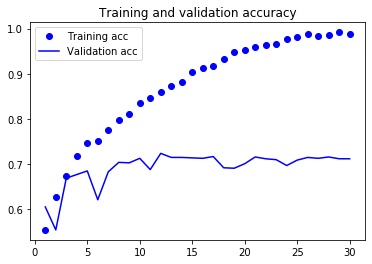

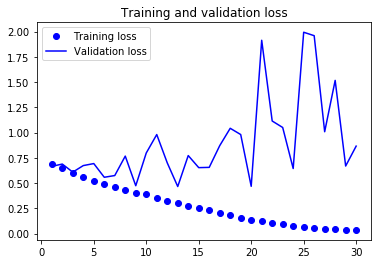

'\nThese plots are characteristic  of overfitting. The training accuracy increases linearly\nover time whereas validation accuracy stalls. \n'

In [31]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

'''
These plots are characteristic  of overfitting. The training accuracy increases linearly
over time whereas validation accuracy stalls. 
'''

In [33]:
'''
Data Augmentation: Generate more training data from existing training samples,
by agumenting the samples via a number of random transformations that yield 
believable-looking images. 

Set up a data augmentation via ImageDataGenerator by configuartion a number
of random transformations to be performed on images read.
'''
datagen = ImageDataGenerator( 
            rotation_range=40, 
            width_shift_range=0.2, 
            height_shift_range=0.2, 
            shear_range=0.2, 
            zoom_range=0.2, 
            horizontal_flip=True, 
            fill_mode='nearest')

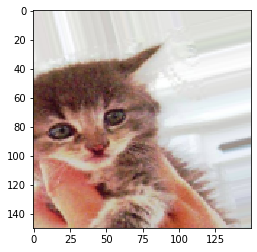

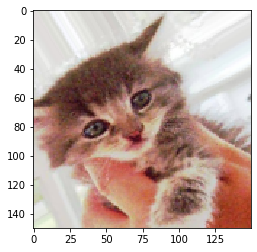

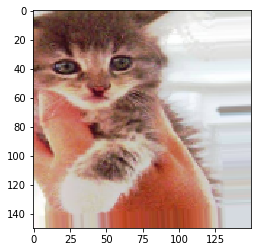

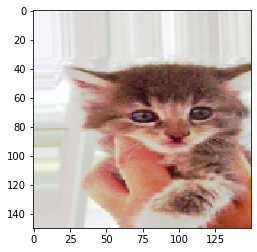

In [34]:
'''
Display some randomly augmented training images.
'''
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Choose one image to augment
img_path = fnames[3]

# Reads the image and resizes it 
img = image.load_img(img_path, target_size=(150, 150))

# Converts to a Numpy array with shape(150, 150, 3)
x = image.img_to_array(img)

# Reshapes to (1,150, 150, 3)
x = x.reshape((1,) + x.shape)

'''
Generates batches of randomly transformed images.
'''
i=0 
for batch in datagen.flow(x, batch_size=1): 
    plt.figure(i) 
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1 
    if i % 4 == 0: 
        break
plt.show()


In [35]:
# To further mitiage overfitting, define a new convent that includes dropout
model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [37]:
# Retrain the convent using data-augmentation generators
train_datagen = ImageDataGenerator( 
                rescale=1./255, 
                rotation_range=40, 
                width_shift_range=0.2, 
                height_shift_range=0.2, 
                shear_range=0.2, 
                zoom_range=0.2, 
                horizontal_flip=True,)

# Validation data should not be augmented
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( 
                    train_dir, 
                    target_size=(150, 150),
                    batch_size=32, 
                    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory( 
                        validation_dir, 
                        target_size=(150, 150), 
                        batch_size=32,
                        class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 68s 676ms/step - loss: 0.6422 - acc: 0.6241 - val_loss: 0.5982 - val_acc: 0.6707
Epoch 2/100
100/100 [==============================] - 111s 1s/step - loss: 0.6286 - acc: 0.6460 - val_loss: 0.6829 - val_acc: 0.6746
Epoch 3/100
100/100 [==============================] - 114s 1s/step - loss: 0.6135 - acc: 0.6600 - val_loss: 0.5646 - val_acc: 0.6536
Epoch 4/100
100/100 [==============================] - 113s 1s/step - loss: 0.6041 - acc: 0.6665 - val_loss: 0.6447 - val_acc: 0.6901
Epoch 5/100
100/100 [==============================] - 112s 1s/step - loss: 0.5912 - acc: 0.6831 - val_loss: 0.4894 - val_acc: 0.6364
Epoch 6/100
100/100 [==============================] - 517s 5s/step - loss: 0.5806 - acc: 0.6888 - val_loss: 0.5908 - val_acc: 0.7165
Epoch 7/100
100/100 [==============================] - 67s 669ms/step - loss: 0.5880 - acc: 0.6881 - val_loss:

Epoch 61/100
100/100 [==============================] - 62s 615ms/step - loss: 0.4124 - acc: 0.8093 - val_loss: 0.4035 - val_acc: 0.7970
Epoch 62/100
100/100 [==============================] - 62s 615ms/step - loss: 0.4150 - acc: 0.8100 - val_loss: 0.4551 - val_acc: 0.8065
Epoch 63/100
100/100 [==============================] - 103s 1s/step - loss: 0.4146 - acc: 0.8109 - val_loss: 0.5128 - val_acc: 0.7829
Epoch 64/100
100/100 [==============================] - 113s 1s/step - loss: 0.4035 - acc: 0.8182 - val_loss: 0.2655 - val_acc: 0.8138
Epoch 65/100
100/100 [==============================] - 113s 1s/step - loss: 0.3981 - acc: 0.8178 - val_loss: 0.3597 - val_acc: 0.8039
Epoch 66/100
100/100 [==============================] - 113s 1s/step - loss: 0.4016 - acc: 0.8138 - val_loss: 0.5067 - val_acc: 0.8151
Epoch 67/100
100/100 [==============================] - 113s 1s/step - loss: 0.4087 - acc: 0.8122 - val_loss: 0.3945 - val_acc: 0.8033
Epoch 68/100
100/100 [=============================

In [38]:
# Save the model
model.save('cats_and_dogs_small_2.h5')

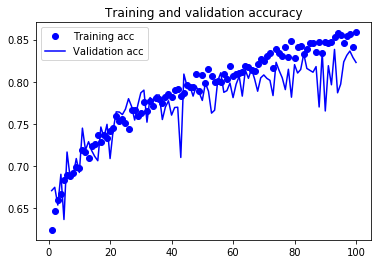

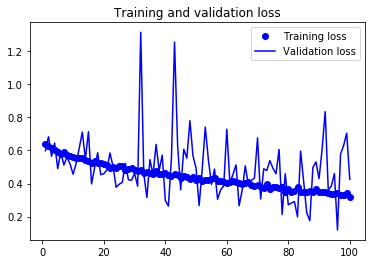

In [39]:
# Plotting the results again
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()